#  Big Data Mart Sales Problem

### Problem Statement:
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.
 

In [1]:
#import necessary libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
 
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn import metrics

### Loading the Datasets

In [3]:
train = pd.read_csv('bigdatamart_Train.csv')
test = pd.read_csv('bigdatamart_Test.csv')
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
#getting the information of datasets

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
#checking for the datatypes of all attributes
test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [7]:
#checking for the null values
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
#checking the statistics and getting the overview of data
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [11]:
#checking for different columns in datasets

print(train.columns,'\n\n',test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object') 

 Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


## Exploratory Data Analysis

It is recommended practice that we merge both train and test data.

Let us merge the train and test dataset for Exploratory Data Analysis.


In [12]:
#adding a label column with variables: train and test
train['label'] = 'train_d'
test['label']='test_d'

In [13]:
#combining both the datasets so as to work on data preprocessing before building the models

df = pd.concat([train,test],ignore_index=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,label
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_d
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_d
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_d
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train_d
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test_d
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test_d
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test_d
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test_d


In [14]:
#let us check for number of rows and columns in combined dataset
df.shape

(14204, 13)

In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
#checking the null values datasets
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
label                           0
dtype: int64

In [17]:
#checking for unique values in 'Item_Fat_Content' column
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

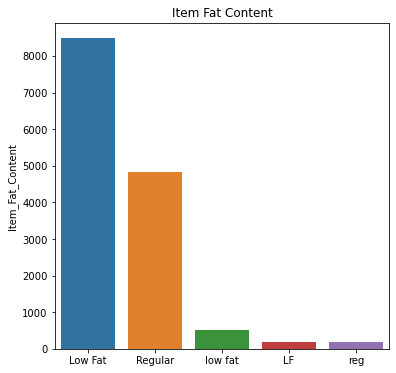

In [18]:
#visualizing 'Item_Fat_Content' values
plt.figure(figsize=(6,6), facecolor='w')
sns.barplot(x=df['Item_Fat_Content'].unique(),y=df['Item_Fat_Content'].value_counts())
plt.title('Item Fat Content')
plt.show()

We can see that there are different names for same category which can be combined. We will have only 2 unique category of fat column.

In [19]:
#reducing the unique values with different names to 2 common names
df['Item_Fat_Content'].replace('low fat', 'Low Fat',inplace=True )
df['Item_Fat_Content'].replace('LF', 'Low Fat',inplace=True)
df['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

df['Item_Fat_Content'].unique()



array(['Low Fat', 'Regular'], dtype=object)

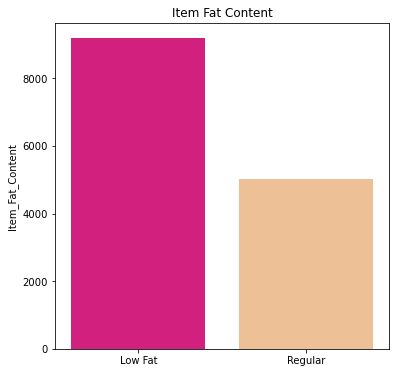

In [20]:
#visualising again the Item_Fat_Content data.
plt.figure(figsize=(6,6), facecolor='w')
sns.barplot(x=df['Item_Fat_Content'].unique(),y=df['Item_Fat_Content'].value_counts(),palette='Accent_r')
plt.title('Item Fat Content')
plt.show()

Out of total data sets, the items with low fat content are more then regular fat content. 

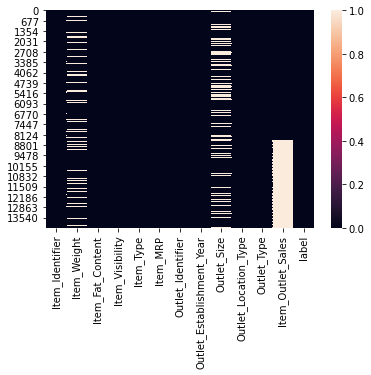

In [21]:
#missing values can be visualized using graphs
sns.heatmap(df.isnull())
plt.show()

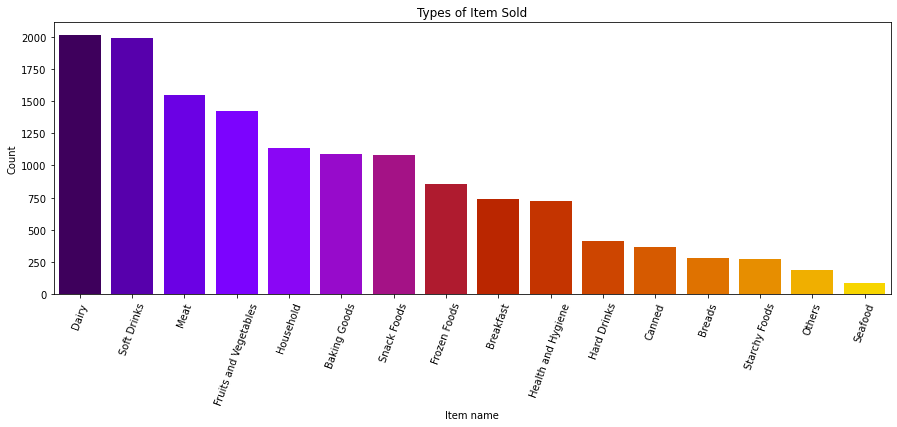

In [22]:
#Visualising the types of items sold
plt.figure(figsize=(15,5), facecolor='w')
sns.barplot(x=df['Item_Type'].unique(),y=df['Item_Type'].value_counts(), saturation=1,palette='gnuplot')
plt.xticks(rotation=70)
plt.title('Types of Item Sold')
plt.xlabel('Item name')
plt.ylabel('Count')
plt.show()

Out of all types of items sold, Diary products and Soft drinks are the most sold items

<Figure size 432x576 with 0 Axes>

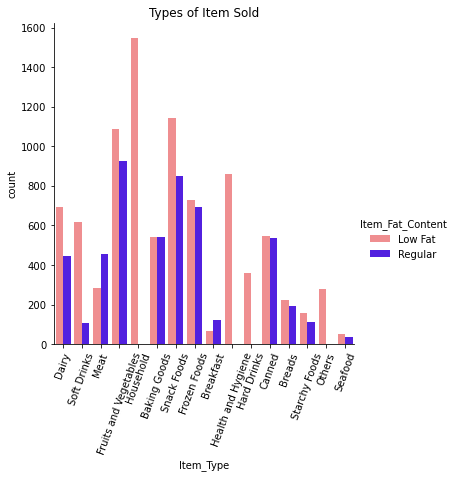

In [23]:
#checking for different type of items sold based on there fat content level
plt.figure(figsize=(6,8), facecolor='w')
sns.catplot(x='Item_Type',hue='Item_Fat_Content',data=df, kind='count',palette='gnuplot2_r')
plt.xticks(rotation=70)
plt.title('Types of Item Sold')

plt.show()

['Medium' nan 'High' 'Small']


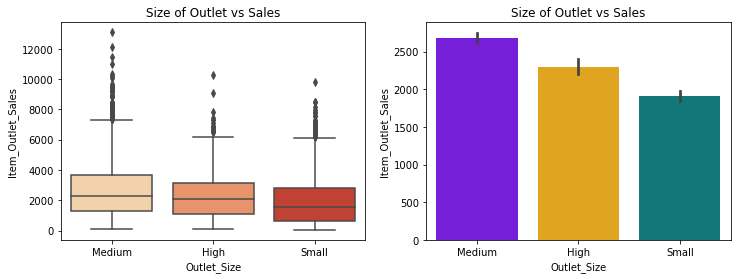

In [24]:
#analysing relationship between size of outlet and sales
print(df['Outlet_Size'].unique())
plt.figure(figsize=(12,4), facecolor='w')
ax = plt.subplot(1,2,1)
sns.boxplot(x=df['Outlet_Size'], y=df['Item_Outlet_Sales'],palette='OrRd')
plt.title('Size of Outlet vs Sales')

ax = plt.subplot(1,2,2)
sns.barplot(x=df['Outlet_Size'], y=df['Item_Outlet_Sales'],palette='prism_r')
plt.title('Size of Outlet vs Sales')

plt.show()

['Tier 1' 'Tier 3' 'Tier 2']


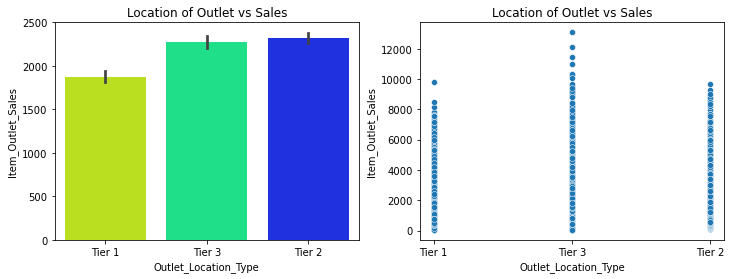

In [24]:
#analysing relationship between location of outlet and sales
print(df['Outlet_Location_Type'].unique())
plt.figure(figsize=(12,4), facecolor='w')
ax = plt.subplot(1,2,1)
sns.barplot(x=df['Outlet_Location_Type'], y=df['Item_Outlet_Sales'],palette='gist_rainbow')
plt.title('Location of Outlet vs Sales')
 
ax = plt.subplot(1,2,2)
sns.scatterplot(x=df['Outlet_Location_Type'], y=df['Item_Outlet_Sales'],palette='RdYlBu',)
plt.title('Location of Outlet vs Sales')

plt.show()


['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


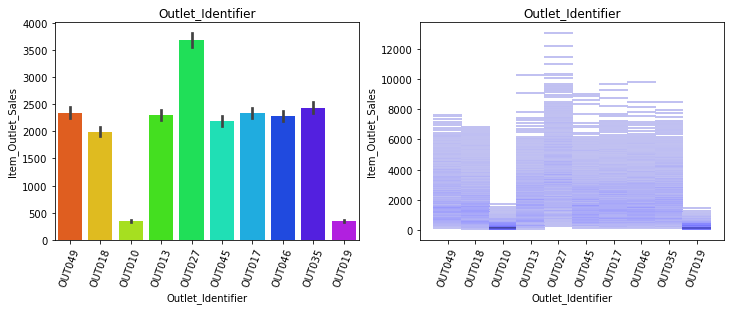

In [26]:
#analysing relationship between outlet id and sales
df['Outlet_Identifier'].unique()

print(df['Outlet_Identifier'].unique())
plt.figure(figsize=(12,4), facecolor='w')
ax = plt.subplot(1,2,1)
sns.barplot(x=df['Outlet_Identifier'], y=df['Item_Outlet_Sales'],palette='gist_rainbow')
plt.title('Outlet_Identifier')
plt.xticks(rotation=70)
    
ax = plt.subplot(1,2,2)
sns.histplot(x=df['Outlet_Identifier'], y=df['Item_Outlet_Sales'],bins=200,color='Blue',kde=True)
plt.xticks(rotation=70)
plt.title('Outlet_Identifier')

plt.show()


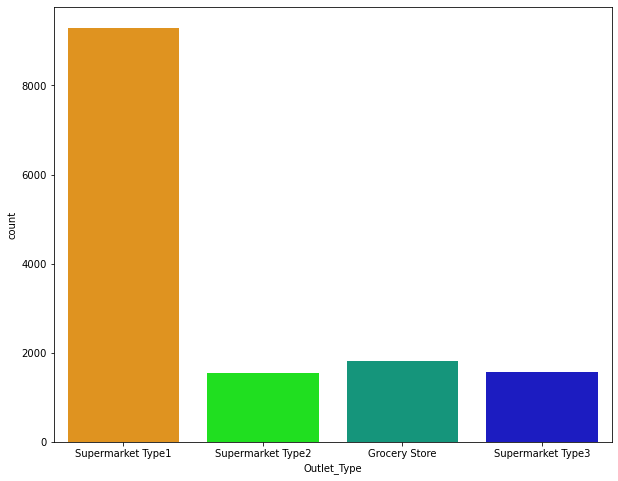

In [27]:
#checing the different type of outlets available
plt.figure(figsize=(10,8))
sns.countplot(df['Outlet_Type'],palette='nipy_spectral_r')
plt.show()

### Bivariate analysis of Item cost and sales of outlet over diffent types of food

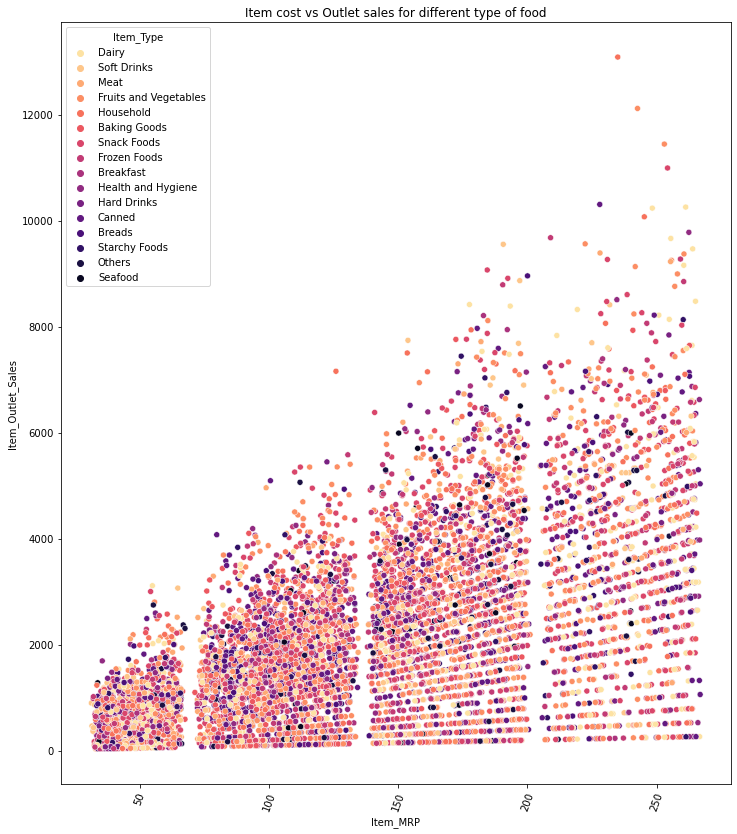

In [28]:
plt.figure(figsize=(12,14), facecolor='w')
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Type',data=df,palette='magma_r')
plt.xticks(rotation=70)
plt.title("Item cost vs Outlet sales for different type of food")
plt.show()

### Bivariate analysis of Item visibility with Sales of Outlet over differnt fat content and type of food available 

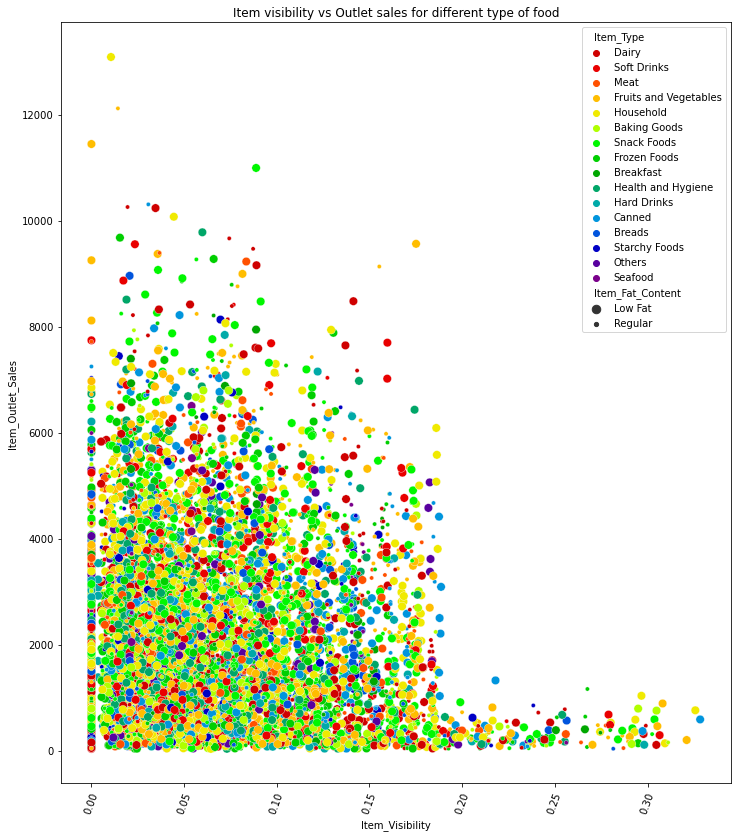

In [29]:
plt.figure(figsize=(12,14), facecolor='w')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Fat_Content',data=df,palette='nipy_spectral_r')
plt.xticks(rotation=70)
plt.title("Item visibility vs Outlet sales for different type of food")
plt.show()

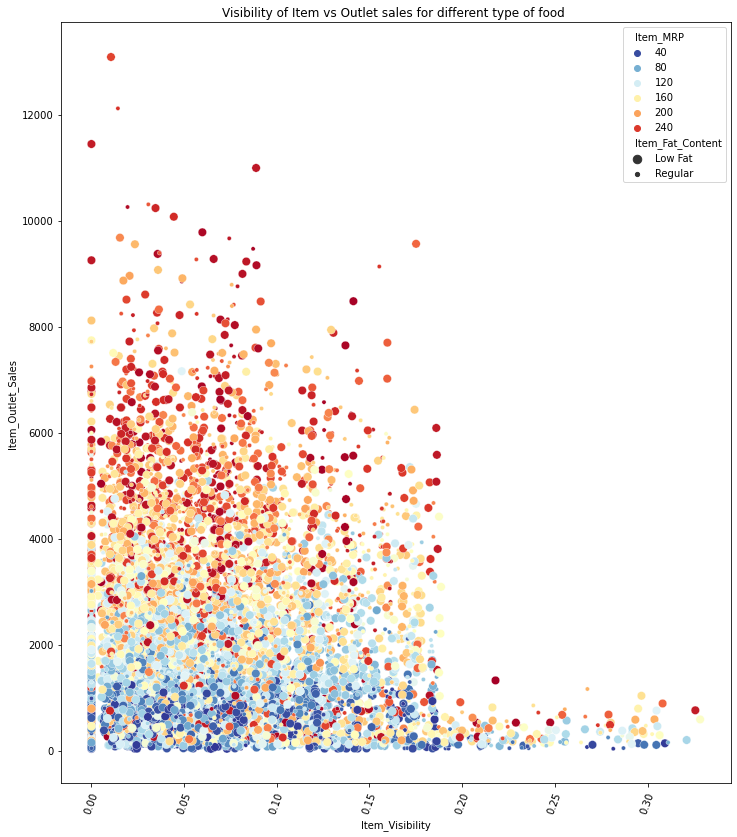

In [30]:
plt.figure(figsize=(12,14), facecolor='w')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',size='Item_Fat_Content',data=df,palette='RdYlBu_r')
plt.xticks(rotation=70)
plt.title("Visibility of Item vs Outlet sales for different type of food ")
plt.show()

<Figure size 864x1008 with 0 Axes>

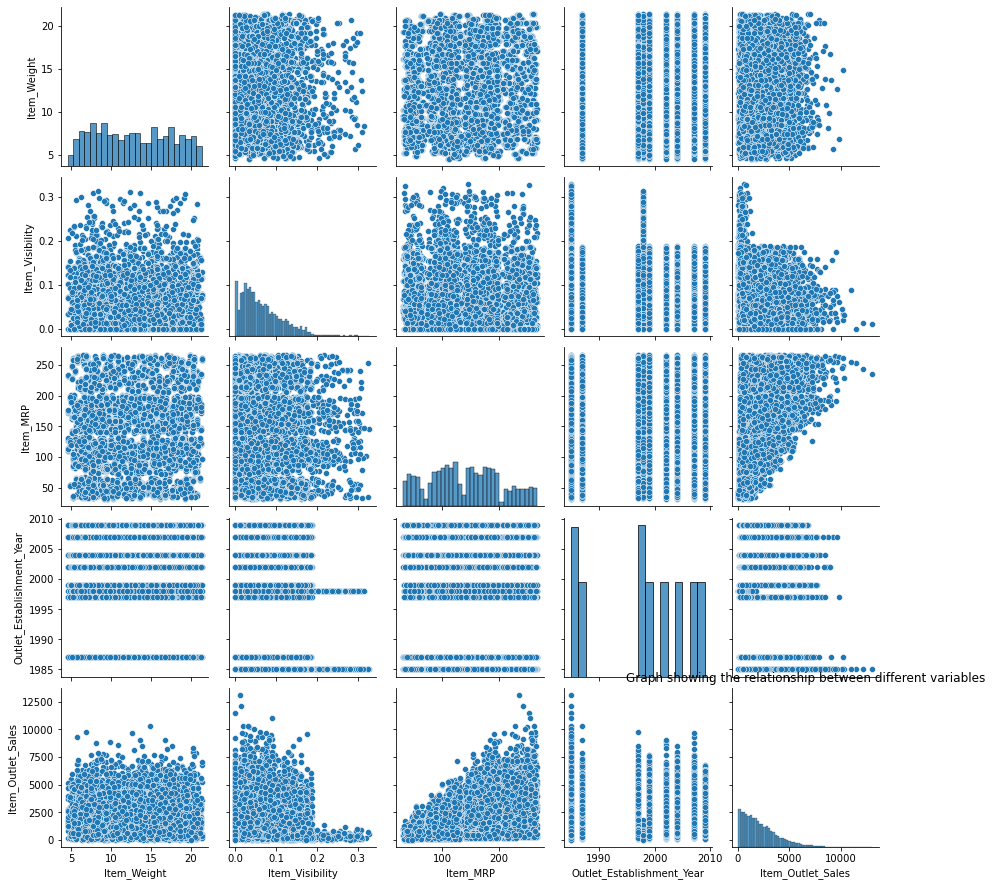

In [31]:
#checking the relationship of individual attributes
plt.figure(figsize=(12,14), facecolor='w')
sns.pairplot(df)
plt.title('Graph showing the relationship between different variables')
plt.show()

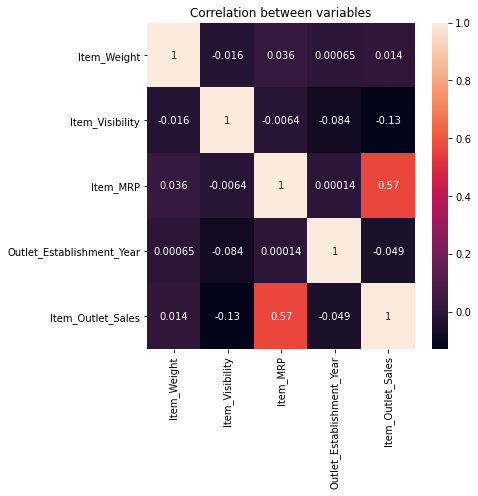

In [32]:
#checking for correlation between the variables

corr = df.corr()
plt.figure(figsize=(6,6), facecolor='white')
sns.heatmap(corr, annot=True)
plt.title('Correlation between variables')
plt.show()

## Handling the missing values
Carrying out missing data imputation is an important and critcal step in preprocessing as missing values can have severe impact on model prediction

Using different imputation methods

In [25]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
label                           0
dtype: int64

In [26]:
#filling the item weights with mean data
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
label                           0
dtype: int64

In [27]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [29]:
#replacing the missing values mode of the column
df['Outlet_Size'].fillna('Medium', inplace=True)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,label
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train_d
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train_d
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train_d
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train_d
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train_d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test_d
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test_d
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test_d
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test_d


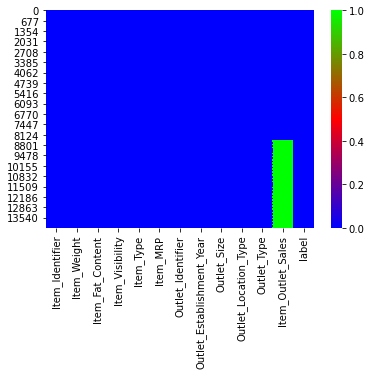

In [30]:
#checking for missing values again
sns.heatmap(df.isnull(),cmap='brg')
plt.show()

Item outlet sales hsa Missing values, as this is the test data set. Hence not treating this column

## Encoding
There are 6 categorical variables which are to be converted into label and  onehot encoded. 


In [31]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
label                         object
dtype: object

In [32]:
#label encoding for all categorical columns
columns = ['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Type']
for col in columns:
    lab_enc = LabelEncoder()
    df[col] = lab_enc.fit_transform(df[col])
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,label
0,FDA15,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train_d
1,DRC01,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train_d
2,FDN15,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train_d
3,FDX07,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,train_d
4,NCD19,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train_d
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1,0.013496,13,141.3154,8,1997,2,0,1,NaN,test_d
14200,FDD47,7.60,1,0.142991,15,169.1448,3,2009,1,2,2,NaN,test_d
14201,NCO17,10.00,0,0.073529,8,118.7440,7,2002,1,1,1,NaN,test_d
14202,FDJ26,15.30,1,0.000000,3,214.6218,2,2007,1,1,1,NaN,test_d


In [33]:
#getting dummy values for all encoded columns
df = pd.get_dummies(df, columns = ['Item_Fat_Content','Outlet_Identifier','Outlet_Size','Outlet_Type',])

In [34]:
df

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,label,Item_Fat_Content_0,...,Outlet_Identifier_7,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,4,249.8092,1999,0,3735.1380,train_d,1,...,0,0,1,0,1,0,0,1,0,0
1,DRC01,5.92,0.019278,14,48.2692,2009,2,443.4228,train_d,0,...,0,0,0,0,1,0,0,0,1,0
2,FDN15,17.50,0.016760,10,141.6180,1999,0,2097.2700,train_d,1,...,0,0,1,0,1,0,0,1,0,0
3,FDX07,19.20,0.000000,6,182.0950,1998,2,732.3800,train_d,0,...,0,0,0,0,1,0,1,0,0,0
4,NCD19,8.93,0.000000,9,53.8614,1987,2,994.7052,train_d,1,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,13,141.3154,1997,0,NaN,test_d,0,...,0,1,0,0,0,1,0,1,0,0
14200,FDD47,7.60,0.142991,15,169.1448,2009,2,NaN,test_d,0,...,0,0,0,0,1,0,0,0,1,0
14201,NCO17,10.00,0.073529,8,118.7440,2002,1,NaN,test_d,1,...,1,0,0,0,1,0,0,1,0,0
14202,FDJ26,15.30,0.000000,3,214.6218,2007,1,NaN,test_d,0,...,0,0,0,0,1,0,0,1,0,0


In [35]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Establishment_Year      int64
Outlet_Location_Type           int32
Item_Outlet_Sales            float64
label                         object
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Outlet_Identifier_0            uint8
Outlet_Identifier_1            uint8
Outlet_Identifier_2            uint8
Outlet_Identifier_3            uint8
Outlet_Identifier_4            uint8
Outlet_Identifier_5            uint8
Outlet_Identifier_6            uint8
Outlet_Identifier_7            uint8
Outlet_Identifier_8            uint8
Outlet_Identifier_9            uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
O

In [36]:
#creating outlet establishment year into years of serving.
df['Total Years'] = 2021-df['Outlet_Establishment_Year']
df.drop(columns=['Outlet_Establishment_Year'])

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Location_Type,Item_Outlet_Sales,label,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Total Years
0,FDA15,9.30,0.016047,4,249.8092,0,3735.1380,train_d,1,0,...,0,1,0,1,0,0,1,0,0,22
1,DRC01,5.92,0.019278,14,48.2692,2,443.4228,train_d,0,1,...,0,0,0,1,0,0,0,1,0,12
2,FDN15,17.50,0.016760,10,141.6180,0,2097.2700,train_d,1,0,...,0,1,0,1,0,0,1,0,0,22
3,FDX07,19.20,0.000000,6,182.0950,2,732.3800,train_d,0,1,...,0,0,0,1,0,1,0,0,0,23
4,NCD19,8.93,0.000000,9,53.8614,2,994.7052,train_d,1,0,...,0,0,1,0,0,0,1,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,0.013496,13,141.3154,0,NaN,test_d,0,1,...,1,0,0,0,1,0,1,0,0,24
14200,FDD47,7.60,0.142991,15,169.1448,2,NaN,test_d,0,1,...,0,0,0,1,0,0,0,1,0,12
14201,NCO17,10.00,0.073529,8,118.7440,1,NaN,test_d,1,0,...,0,0,0,1,0,0,1,0,0,19
14202,FDJ26,15.30,0.000000,3,214.6218,1,NaN,test_d,0,1,...,0,0,0,1,0,0,1,0,0,14


In [37]:
#splittinf the train and test data
train = df.loc[df['label']=='train_d']
test = df.loc[df['label']=='test_d']

train.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,label,Item_Fat_Content_0,...,Outlet_Identifier_8,Outlet_Identifier_9,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3,Total Years
0,FDA15,9.30,0.016047,4,249.8092,1999,0,3735.1380,train_d,1,...,0,1,0,1,0,0,1,0,0,22
1,DRC01,5.92,0.019278,14,48.2692,2009,2,443.4228,train_d,0,...,0,0,0,1,0,0,0,1,0,12
2,FDN15,17.50,0.016760,10,141.6180,1999,0,2097.2700,train_d,1,...,0,1,0,1,0,0,1,0,0,22
3,FDX07,19.20,0.000000,6,182.0950,1998,2,732.3800,train_d,0,...,0,0,0,1,0,1,0,0,0,23
4,NCD19,8.93,0.000000,9,53.8614,1987,2,994.7052,train_d,1,...,0,0,1,0,0,0,1,0,0,34


In [38]:
#selecting independent and target variables
train.drop(columns=['Item_Identifier','label'],axis=1,inplace=True)
test.drop(columns=['Item_Identifier','label','Item_Outlet_Sales'],axis=1,inplace=True)


#creating X_train, X_test, y_train datasets to train the models
X_train = train.drop(['Item_Outlet_Sales'],axis=1)
y_train = train['Item_Outlet_Sales']

X_test = test

## Model Building:

### 1. Linear Regression

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)

#predicted values
y_pred

array([1830., 1573., 1887., ..., 1825., 3562., 1265.])

In [47]:
print('The accuracy is of model is',lin_reg.score(X_train, y_train)*100)

The accuracy is of model is 56.34851461341995


### Lasso Regularization

In [48]:
lass = Lasso()
lass.fit(X_train, y_train)

#predicting the target
y_pred = lass.predict(X_test)

y_pred

array([1810.26183555, 1554.1911789 , 1894.7075955 , ..., 1841.27380917,
       3532.20340667, 1284.08733748])

In [49]:
print('The accuracy is of model is',lass.score(X_train, y_train)*100)

The accuracy is of model is 56.338554072195116


In [50]:
#applying gridSearchCV

param = {'alpha': np.arange(0.0001,0.2,0.002)}
grid_lass= GridSearchCV(estimator=lass,param_grid=param,n_jobs=2,cv=5,verbose=2)

grid_lass.fit(X_train,y_train)
pred1 = grid_lass.predict(X_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [51]:
print('The accuracy is of model is',grid_lass.score(X_train, y_train)*100)

The accuracy is of model is 56.34845515574973


### 2.  Decision Tree


In [52]:
Dec_tree = DecisionTreeRegressor()
Dec_tree.fit(X_train, y_train)

y_pred = Dec_tree.predict(X_test)
y_pred

array([ 970.7364,  959.4178, 1775.6886, ...,  942.7728, 7247.233 ,
       1137.1864])

In [53]:
print('The accuracy is of model is',Dec_tree.score(X_train, y_train)*100)

The accuracy is of model is 100.0


In [64]:
#tuning the hyperparameters
grid_param = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 15, 20],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [2, 6, 12],
              "max_leaf_nodes": [5, 8, 10],
              }

grid_dec = GridSearchCV(estimator=Dec_tree,param_grid=grid_param,verbose=2, n_jobs=1,)
grid_dec.fit(X_train, y_train)

y_pred = grid_dec.predict(X_test)
y_pred

Fitting 5 folds for each of 162 candidates, totalling 810 fits
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END 

[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=2, max_leaf_nodes=8, min_samples_l

[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=10; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=5, min_samples_leaf=

[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_samples_leaf=12, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=6, max_leaf_nodes=8, min_sampl

[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=6, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=5, min_samples_leaf=

[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=15; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=20; total time=   0.0s
[CV] END criterion=mse, max_depth=8, max_leaf_nodes=10, min_samp

[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=10; total time=   1.4s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=10; total time=   1.4s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=10; total time=   1.5s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=15; total time=   1.5s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=15; total time=   1.2s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=15; total time=   1.4s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=15; total time=   1.9s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=15; total time=   1.3s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=5, min_sampl

[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=20; total time=   1.1s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samples_leaf=2, min_samples_split=20; total time=   1.1s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10; total time=   1.0s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10; total time=   1.1s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10; total time=   1.1s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10; total time=   1.1s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=10; total time=   1.0s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15; total time=   1.2s
[CV] END criterion=mae, max_depth=2, max_leaf_nodes=10, min_samp

[CV] END criterion=mae, max_depth=6, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=15; total time=   1.3s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=20; total time=   1.3s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=20; total time=   1.3s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=20; total time=   1.3s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=20; total time=   1.3s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=5, min_samples_leaf=12, min_samples_split=20; total time=   1.3s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   1.4s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   1.4s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=8, min_samples

[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15; total time=   1.5s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15; total time=   1.5s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15; total time=   2.1s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15; total time=   1.7s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=15; total time=   1.6s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=20; total time=   1.5s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=20; total time=   1.5s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=20; total time=   1.5s
[CV] END criterion=mae, max_depth=6, max_leaf_nodes=10, min_samp

[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   2.4s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   2.7s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   3.1s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=10; total time=   2.5s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=15; total time=   2.4s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=15; total time=   2.4s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=15; total time=   2.5s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=2, min_samples_split=15; total time=   2.5s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=8, min_samples_leaf=

[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=20; total time=   1.8s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=20; total time=   1.9s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min_samples_leaf=6, min_samples_split=20; total time=   1.8s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min_samples_leaf=12, min_samples_split=10; total time=   1.8s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min_samples_leaf=12, min_samples_split=10; total time=   1.7s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min_samples_leaf=12, min_samples_split=10; total time=   1.7s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min_samples_leaf=12, min_samples_split=10; total time=   1.8s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min_samples_leaf=12, min_samples_split=10; total time=   1.7s
[CV] END criterion=mae, max_depth=8, max_leaf_nodes=10, min

array([1780.3492, 1332.2658,  418.1224, ..., 1780.3492, 3720.8233,
       1332.2658])

In [66]:
print('The accuracy is of model is',grid_dec.score(X_train, y_train)*100)

The accuracy is of model is 58.386274604686726


### 3. Random Forest

In [72]:
random_reg = RandomForestRegressor()
random_reg.fit(X_train,y_train)

y_pred = random_reg.predict(X_test)
y_pred

array([1786.421296, 1277.763412,  671.179664, ..., 1660.751546,
       4638.874946, 1454.67313 ])

In [73]:
print('The accuracy is of model is',random_reg.score(X_train, y_train)*100)

The accuracy is of model is 93.87763743867424


### 4. XGBoost

In [85]:
xg_reg = XGBRegressor()
xg_reg.fit(X_train,y_train)

y_pred = xg_reg.predict(X_test)
y_pred

array([1618.7258, 1374.138 , 1254.6547, ..., 1745.4015, 5262.642 ,
       1348.7654], dtype=float32)

In [86]:
print('The accuracy is of model is',xg_reg.score(X_train, y_train)*100)

The accuracy is of model is 83.40716617337578


## Saving the best model

In [87]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Big Data Mart Sales.pkl','wb')

In [88]:
#dump the information to the file
pickle.dump(random_reg,file)